We ranked these regions by the number of unique TFs bound and set a threshold of the 90th percentile of the number of TFs to define HOT sites, similar to previous methods.

In [1]:
import os
import pandas as pd

# plotting modules
import matplotlib.colors as colors
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

/data5/deepro/miniconda3/envs/starrseq/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
meta_activity_file = "/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data/meta_activity_map.csv"
meta_df = pd.read_csv(meta_activity_file, low_memory=False)
cc_decile_ranks, decile_labels = pd.qcut(meta_df.CC, q=10, labels=False, retbins=True)
meta_df["cc_decile"] = cc_decile_ranks

In [4]:
hot_df = pd.read_csv("/data5/deepro/starrseq/papers/results/2_categorize_fragments_on_activity/data/hot_sites/tf_overlap_fragments.bed", sep="\t", header=None, names=["chrm", "start", "end", "tf", "number"])
hot_df["chrom_coord"] = hot_df.chrm + "_" + hot_df.start.astype(str) + "_" + hot_df.end.astype(str)
hot_df = hot_df.drop(columns=["chrm", "start", "end"])

In [5]:
meta_df = meta_df.merge(hot_df, on="chrom_coord")

Text(0, 0.5, 'Number of TF binding sites')

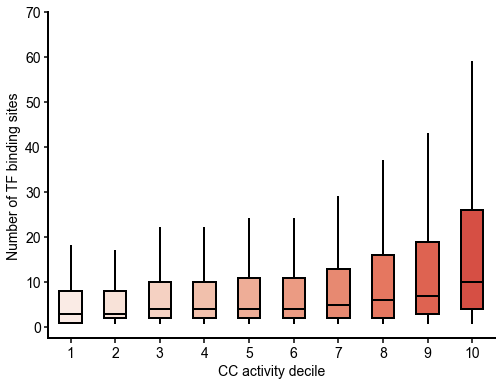

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns_ax = sns.boxplot(
    data=meta_df, x="cc_decile", y="number",
    palette=sns.color_palette("Reds", 15).as_hex()[:10],
    orient="v",
    width=0.5,
    linewidth=2.,
    fliersize=0, capprops={'color':'none'}, boxprops={'edgecolor':'k'}, whiskerprops={'color':'k'}, medianprops={'color':'k'}, # , 'facecolor': 'none'
    ax=ax
    )
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylim((-2.5, 70))
ax.set_xlim((-0.5, 9.5))
ax.set_xticks(range(0, 10), range(1, 11))
ax.set_xlabel("CC activity decile")
ax.set_ylabel("Number of TF binding sites")
# ax.spines.left.set_position(('outward', 10))
# ax.spines.bottom.set_position(('outward', 10))

In [7]:
save_file = "../data/figures/hot_sites_per_decile.pdf"
save_pdf(save_file, fig)

For each active fragments per library, how many belong to these high occupancy sites?